# Movie Recommendation System - PHASE 1: Exploratory Data Analysis (EDA)

## Overview
This notebook performs comprehensive exploratory data analysis on movie datasets to understand:
- Movie distributions by genre, year, and ratings
- User rating patterns and preferences
- Data quality and missing values
- Statistical summaries and correlations

The analysis will prepare the foundation for content-based recommendation models.

## Section 1: Load and Explore Movie Dataset

In [4]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [6]:
# Load real TMDB dataset from data folder
import json

print("Loading TMDB dataset...")
data_path = '../data'

# Load movies data
df_movies = pd.read_csv(f'{data_path}/tmdb_5000_movies.csv')

# Load credits data for cast information
df_credits = pd.read_csv(f'{data_path}/tmdb_5000_credits.csv')

# Merge movies and credits
df_movies = df_movies.merge(df_credits, on='title', how='left')

print("✓ Real TMDB Dataset loaded successfully!")
print(f"\nDataset Shape: {df_movies.shape}")
print(f"\nColumn Names:")
print(df_movies.columns.tolist())
print(f"\nFirst 5 rows:")
print(df_movies.head())

# Display essential columns
print("\n✓ Available columns for analysis:")
print(f"  - title: Movie titles")
print(f"  - genres: Movie genres (JSON)")
print(f"  - overview: Movie descriptions")
print(f"  - vote_average: Average rating")
print(f"  - vote_count: Number of votes")
print(f"  - popularity: Popularity score")
print(f"  - cast: Cast information (JSON)")
print(f"  - keywords: Keywords (JSON)")

Loading TMDB dataset...
✓ Real TMDB Dataset loaded successfully!

Dataset Shape: (4809, 23)

Column Names:
['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id', 'cast', 'crew']

First 5 rows:
      budget  \
0  237000000   
1  300000000   
2  245000000   
3  250000000   
4  260000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   
2                                            [{"

In [7]:
# Display dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(f"\nDataset Shape: {df_movies.shape}")
print(f"Total Movies: {len(df_movies)}")
print(f"Total Columns: {df_movies.shape[1]}")
print(f"\nColumn Data Types:")
print(df_movies.dtypes)
print(f"\nBasic Statistics:")
print(df_movies.describe())

DATASET INFORMATION

Dataset Shape: (4809, 23)
Total Movies: 4809
Total Columns: 23

Column Data Types:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object

Basic Statistics:
             budget             id   popularity       revenue      runtime  \
count  4.809000e+03    4809.000000  4809.000000  

## Section 2: Analyze Movie Distributions and Ratings

In [9]:
# Extract genres from JSON strings
df_movies['genres_list'] = df_movies['genres'].apply(lambda x: json.loads(x) if pd.notna(x) else [])

# Flatten genres for analysis
all_genres = []
for genres in df_movies['genres_list']:
    all_genres.extend(genres)

genre_distribution = pd.Series(all_genres).value_counts()

print("\n" + "=" * 80)
print("GENRE DISTRIBUTION")
print("=" * 80)
print(f"\nUnique Genres: {len(genre_distribution)}")
print(f"\nTop 10 Genres:")
print(genre_distribution.head(10))

# Release year distribution
print("\n" + "=" * 80)
print("RELEASE YEAR DISTRIBUTION")
print("=" * 80)
# Extract year from release_date
df_movies['release_year'] = pd.to_datetime(df_movies['release_date'], errors='coerce').dt.year
print(f"\nYear Range: {df_movies['release_year'].min():.0f} - {df_movies['release_year'].max():.0f}")
print(f"\nMovies by Decade:")
print(df_movies.groupby(df_movies['release_year'] // 10 * 10).size())

# Rating statistics
print("\n" + "=" * 80)
print("RATING STATISTICS")
print("=" * 80)
print(f"\nRating Average: {df_movies['vote_average'].mean():.2f}")
print(f"Rating Std Dev: {df_movies['vote_average'].std():.2f}")
print(f"Rating Range: {df_movies['vote_average'].min():.2f} - {df_movies['vote_average'].max():.2f}")
print(f"\nVote Count Statistics:")
print(df_movies['vote_count'].describe())


GENRE DISTRIBUTION

Unique Genres: 20

Top 10 Genres:
{'id': 18, 'name': 'Drama'}               2300
{'id': 35, 'name': 'Comedy'}              1723
{'id': 53, 'name': 'Thriller'}            1275
{'id': 28, 'name': 'Action'}              1156
{'id': 10749, 'name': 'Romance'}           895
{'id': 12, 'name': 'Adventure'}            792
{'id': 80, 'name': 'Crime'}                697
{'id': 878, 'name': 'Science Fiction'}     538
{'id': 27, 'name': 'Horror'}               520
{'id': 10751, 'name': 'Family'}            514
Name: count, dtype: int64

RELEASE YEAR DISTRIBUTION

Year Range: 1916 - 2017

Movies by Decade:
release_year
1910.0       1
1920.0       4
1930.0      15
1940.0      25
1950.0      27
1960.0      72
1970.0     109
1980.0     280
1990.0     778
2000.0    2050
2010.0    1447
dtype: int64

RATING STATISTICS

Rating Average: 6.09
Rating Std Dev: 1.19
Rating Range: 0.00 - 10.00

Vote Count Statistics:
count     4809.000000
mean       690.331670
std       1234.187111
min     

## Section 3: Create Visualizations and Word Clouds

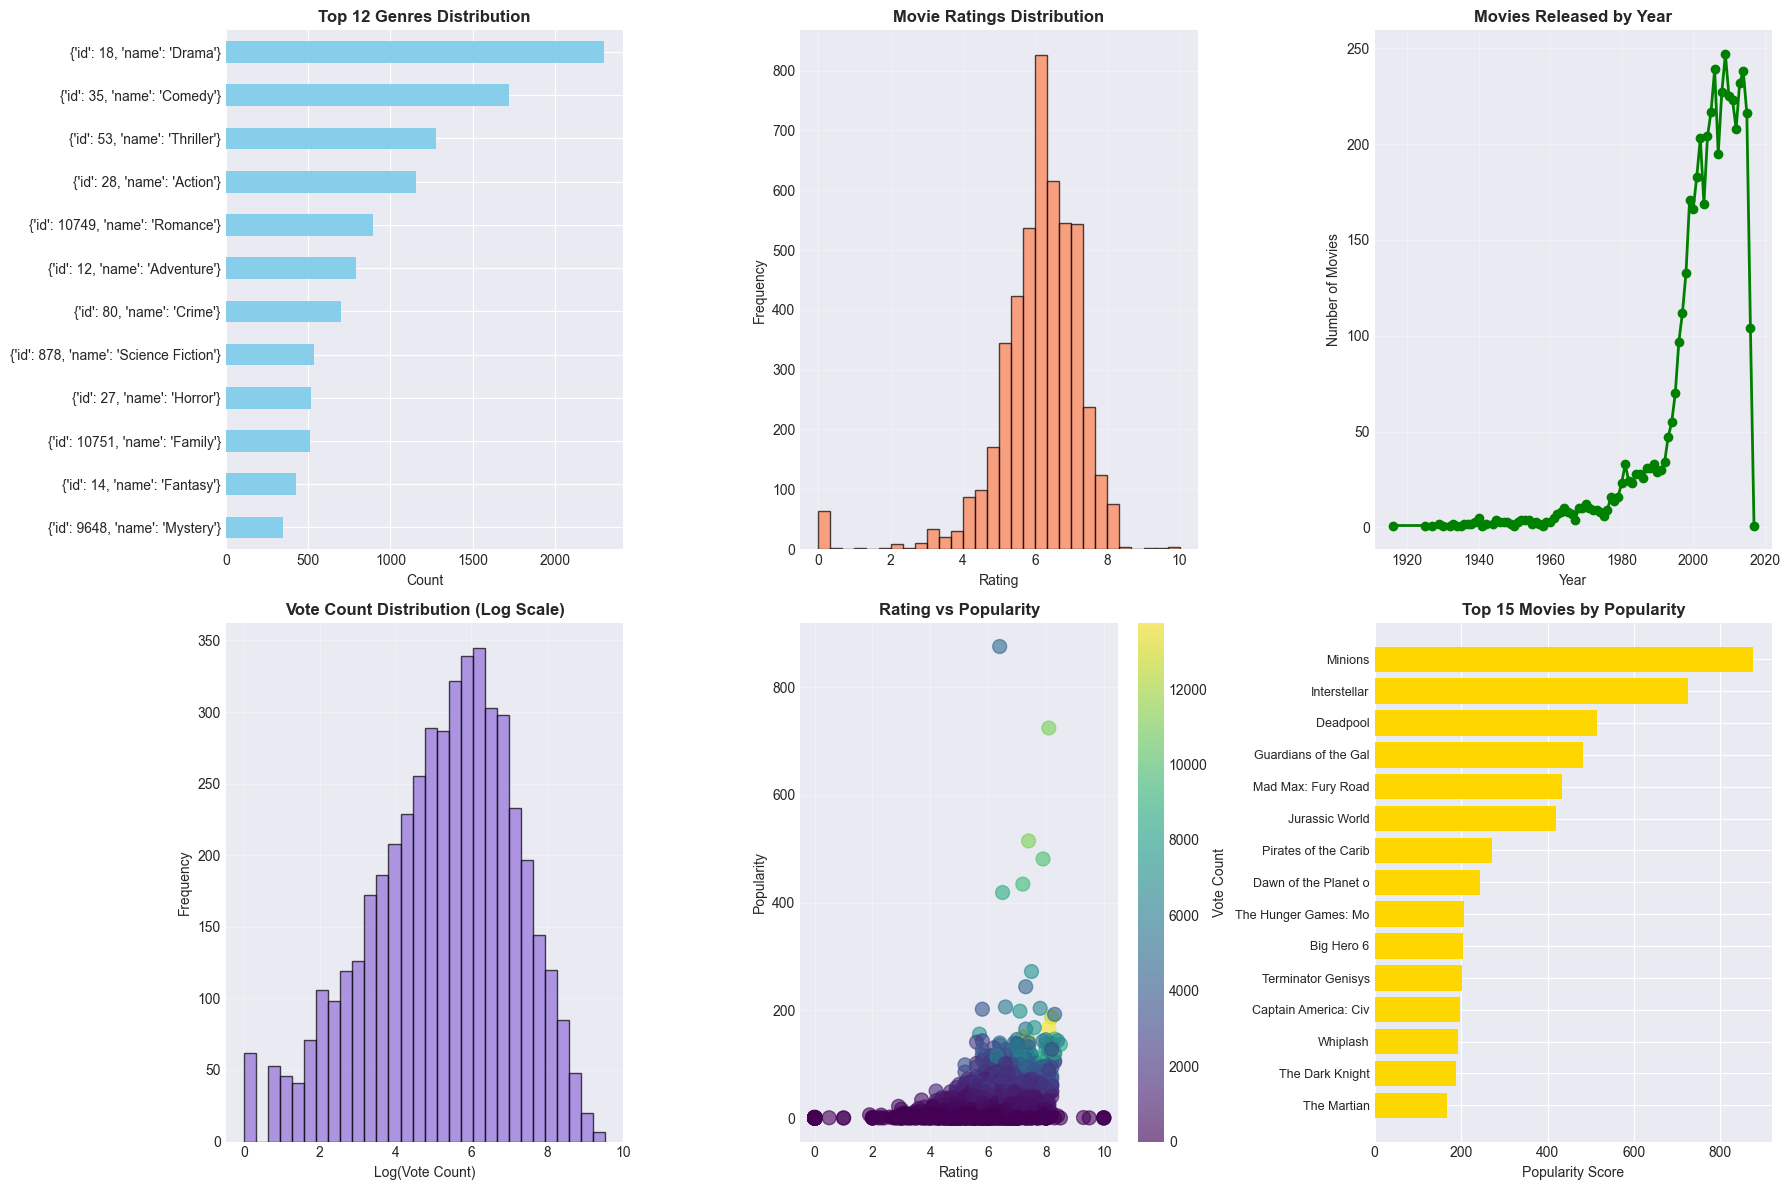

✓ Visualizations created and saved!


In [10]:
# Create comprehensive visualizations
fig = plt.figure(figsize=(18, 12))

# 1. Genre Distribution
ax1 = plt.subplot(2, 3, 1)
genre_distribution.head(12).plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_xlabel('Count')
ax1.set_title('Top 12 Genres Distribution', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# 2. Rating Distribution
ax2 = plt.subplot(2, 3, 2)
ax2.hist(df_movies['vote_average'], bins=30, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Frequency')
ax2.set_title('Movie Ratings Distribution', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# 3. Release Year Distribution
ax3 = plt.subplot(2, 3, 3)
year_counts = df_movies['release_year'].value_counts().sort_index()
ax3.plot(year_counts.index, year_counts.values, marker='o', color='green', linewidth=2)
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Movies')
ax3.set_title('Movies Released by Year', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# 4. Vote Count Distribution (log scale)
ax4 = plt.subplot(2, 3, 4)
ax4.hist(np.log1p(df_movies['vote_count']), bins=30, color='mediumpurple', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Log(Vote Count)')
ax4.set_ylabel('Frequency')
ax4.set_title('Vote Count Distribution (Log Scale)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

# 5. Popularity vs Rating
ax5 = plt.subplot(2, 3, 5)
scatter = ax5.scatter(df_movies['vote_average'], df_movies['popularity'], 
                     alpha=0.6, c=df_movies['vote_count'], cmap='viridis', s=100)
ax5.set_xlabel('Rating')
ax5.set_ylabel('Popularity')
ax5.set_title('Rating vs Popularity', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax5, label='Vote Count')
ax5.grid(alpha=0.3)

# 6. Top 15 Movies by Popularity
ax6 = plt.subplot(2, 3, 6)
top_movies = df_movies.nlargest(15, 'popularity')[['title', 'popularity']].sort_values('popularity')
ax6.barh(range(len(top_movies)), top_movies['popularity'].values, color='gold')
ax6.set_yticks(range(len(top_movies)))
ax6.set_yticklabels([t[:20] for t in top_movies['title'].values], fontsize=9)
ax6.set_xlabel('Popularity Score')
ax6.set_title('Top 15 Movies by Popularity', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/01_eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations created and saved!")

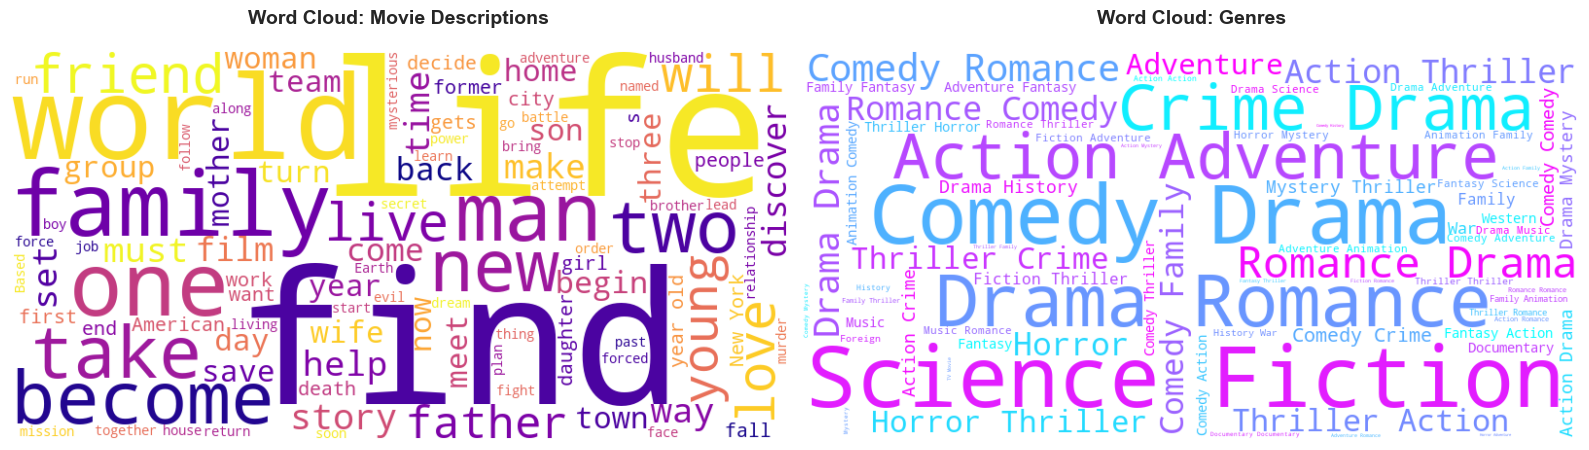

✓ Word clouds created and saved!


In [12]:
# Create Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Word Cloud for Movie Descriptions
text_descriptions = ' '.join(df_movies['overview'].dropna().astype(str))
wordcloud_desc = WordCloud(width=800, height=400, background_color='white', 
                           colormap='plasma', max_words=100).generate(text_descriptions)
axes[0].imshow(wordcloud_desc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud: Movie Descriptions', fontsize=14, fontweight='bold', pad=20)

# Word Cloud for Genres
# Extract genre names from dictionaries
genre_names = [g['name'] if isinstance(g, dict) else str(g) for g in all_genres]
genres_text = ' '.join(genre_names)
wordcloud_genres = WordCloud(width=800, height=400, background_color='white', 
                             colormap='cool', max_words=100).generate(genres_text)
axes[1].imshow(wordcloud_genres, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud: Genres', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../results/02_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Word clouds created and saved!")

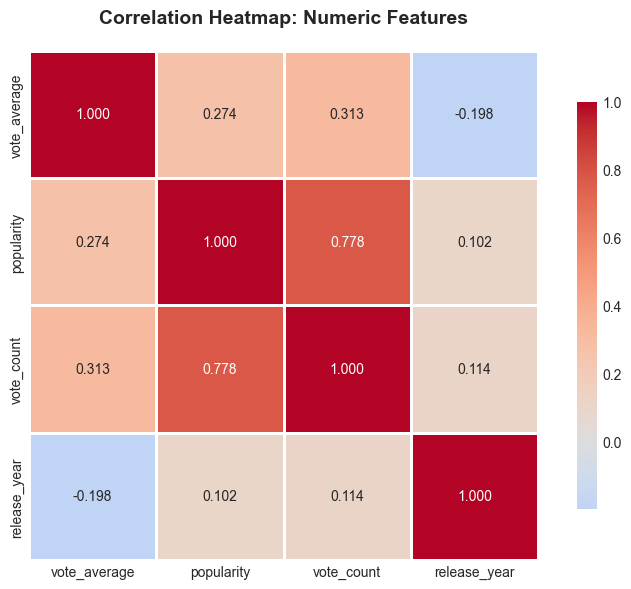

✓ Correlation heatmap created and saved!


In [13]:
# Correlation Heatmap
numeric_cols = ['vote_average', 'popularity', 'vote_count', 'release_year']
correlation_matrix = df_movies[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Numeric Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../results/03_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Correlation heatmap created and saved!")

## Section 4: Text Processing and Feature Engineering

In [17]:
# Import text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)
    
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

# Create tags column by combining genres, keywords, cast, and director
def create_tags(row):
    """Combine genres, keywords, cast, and director into a single tags string"""
    tags = []
    
    # Add genres
    if pd.notna(row['genres']):
        try:
            genres = json.loads(row['genres'])
            for g in genres:
                if isinstance(g, dict) and 'name' in g:
                    tags.append(g['name'])
                else:
                    tags.append(str(g))
        except:
            pass
    
    # Add keywords
    if pd.notna(row['keywords']):
        try:
            keywords = json.loads(row['keywords'])
            for k in keywords:
                if isinstance(k, dict) and 'name' in k:
                    tags.append(k['name'])
                else:
                    tags.append(str(k))
        except:
            pass
    
    # Add cast (limited to first 2 actors)
    if pd.notna(row['cast']):
        try:
            cast = json.loads(row['cast'])[:2]
            for c in cast:
                if isinstance(c, dict) and 'name' in c:
                    tags.append(c['name'])
                else:
                    tags.append(str(c))
        except:
            pass
    
    # Add director if column exists
    if 'director' in row.index and pd.notna(row['director']):
        tags.append(row['director'])
    
    return ' '.join(tags)

df_movies['tags'] = df_movies.apply(create_tags, axis=1)

print("Sample tags for first 5 movies:")
for i in range(5):
    print(f"\n{i+1}. {df_movies.iloc[i]['title']}")
    print(f"   Tags: {df_movies.iloc[i]['tags'][:100]}...")

Sample tags for first 5 movies:

1. Avatar
   Tags: Action Adventure Fantasy Science Fiction culture clash future space war space colony society space t...

2. Pirates of the Caribbean: At World's End
   Tags: Adventure Fantasy Action ocean drug abuse exotic island east india trading company love of one's lif...

3. Spectre
   Tags: Action Adventure Crime spy based on novel secret agent sequel mi6 british secret service united king...

4. The Dark Knight Rises
   Tags: Action Crime Drama Thriller dc comics crime fighter terrorist secret identity burglar hostage drama ...

5. John Carter
   Tags: Action Adventure Science Fiction based on novel mars medallion space travel princess alien steampunk...


In [18]:
# Text cleaning function
import re

def clean_text(text):
    """Clean text: lowercase, remove punctuation, remove stopwords, stemming"""
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits (keep spaces and letters)
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Split into words
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply cleaning to tags
df_movies['tags_cleaned'] = df_movies['tags'].apply(clean_text)

print("Sample cleaned tags:")
for i in range(3):
    print(f"\n{i+1}. Original: {df_movies.iloc[i]['tags'][:80]}")
    print(f"   Cleaned:  {df_movies.iloc[i]['tags_cleaned'][:80]}")
    
print("\n✓ Text processing completed!")

Sample cleaned tags:

1. Original: Action Adventure Fantasy Science Fiction culture clash future space war space co
   Cleaned:  action adventur fantasi scienc fiction cultur clash futur space war space coloni

2. Original: Adventure Fantasy Action ocean drug abuse exotic island east india trading compa
   Cleaned:  adventur fantasi action ocean drug abus exot island east india trade compani lov

3. Original: Action Adventure Crime spy based on novel secret agent sequel mi6 british secret
   Cleaned:  action adventur crime spi base novel secret agent sequel british secret servic u

✓ Text processing completed!


## Section 5: Handle Missing Data and Clean Dataset

In [20]:
# Analyze missing data
print("=" * 80)
print("MISSING DATA ANALYSIS")
print("=" * 80)

missing_data = df_movies.isnull().sum()
missing_percent = (missing_data / len(df_movies)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nMissing Data Summary:")
print(missing_df)

# Remove duplicates based on title column only
print(f"\n\nDuplicates before removal: {df_movies.duplicated(subset=['title']).sum()}")
df_movies = df_movies.drop_duplicates(subset=['title'], keep='first')
print(f"Duplicates after removal: {df_movies.duplicated(subset=['title']).sum()}")

# Handle missing values in critical columns
print(f"\n\nHandling missing values...")

# Fill missing overview with empty string
df_movies['overview'] = df_movies['overview'].fillna("No description available")

# Fill missing cast with generic placeholder
df_movies['cast'] = df_movies['cast'].fillna(json.dumps(["Unknown"]))

# Fill missing keywords with empty list
df_movies['keywords'] = df_movies['keywords'].fillna(json.dumps([]))

# Filter low-quality movies (< 10 votes)
print(f"\nMovies with < 10 votes: {(df_movies['vote_count'] < 10).sum()}")
df_movies = df_movies[df_movies['vote_count'] >= 10]
print(f"Movies after filtering: {len(df_movies)}")

# Create a quality score
df_movies['quality_score'] = (df_movies['vote_average'] * df_movies['vote_count']) / 100

print("\n✓ Data cleaning completed!")
print(f"\nFinal Dataset Shape: {df_movies.shape}")
print(f"Total Movies After Cleaning: {len(df_movies)}")

MISSING DATA ANALYSIS

Missing Data Summary:
          Column  Missing_Count  Missing_Percent
2       homepage           3096        64.379289
16       tagline            844        17.550426
7       overview              3         0.062383
13       runtime              2         0.041589
11  release_date              1         0.020794
24  release_year              1         0.020794


Duplicates before removal: 9
Duplicates after removal: 0


Handling missing values...

Movies with < 10 votes: 411
Movies after filtering: 4389

✓ Data cleaning completed!

Final Dataset Shape: (4389, 28)
Total Movies After Cleaning: 4389


## Section 6: Create TF-IDF Vectorization

In [22]:
# Import TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# Apply TF-IDF vectorization on movie descriptions
print("Applying TF-IDF Vectorization on descriptions...")
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), 
                                    min_df=2, max_df=0.8)
tfidf_matrix_desc = tfidf_vectorizer.fit_transform(df_movies['overview'])

print(f"✓ TF-IDF Matrix Shape (descriptions): {tfidf_matrix_desc.shape}")
print(f"  - {tfidf_matrix_desc.shape[0]} movies")
print(f"  - {tfidf_matrix_desc.shape[1]} features")

# One-hot encoding for genres
print("\nPerforming One-Hot Encoding for genres...")
# Extract genre names from dictionaries
genres_list_names = []
for genres in df_movies['genres_list']:
    genre_names = []
    for g in genres:
        if isinstance(g, dict) and 'name' in g:
            genre_names.append(g['name'])
        else:
            genre_names.append(str(g))
    genres_list_names.append(genre_names)

mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(genres_list_names)
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df_movies.index)

print(f"✓ Genre Matrix Shape: {genres_df.shape}")
print(f"  - {genres_df.shape[0]} movies")
print(f"  - {genres_df.shape[1]} unique genres")

# Create a combined feature matrix
print("\nCreating combined feature matrix...")
from scipy.sparse import hstack

# Normalize numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_features = df_movies[['vote_average', 'popularity', 'release_year']].copy()
numeric_features_scaled = scaler.fit_transform(numeric_features)
numeric_features_df = pd.DataFrame(numeric_features_scaled, 
                                    columns=['rating_scaled', 'popularity_scaled', 'year_scaled'],
                                    index=df_movies.index)

# Combine all features
content_feature_matrix = hstack([
    tfidf_matrix_desc,
    genres_df.values,
    numeric_features_df.values
])

print(f"✓ Combined Feature Matrix Shape: {content_feature_matrix.shape}")
print(f"  - {content_feature_matrix.shape[0]} movies")
print(f"  - {content_feature_matrix.shape[1]} total features")

# Save the index mapping
df_movies_reset = df_movies.reset_index(drop=True)
print("\n✓ Feature engineering completed!")

Applying TF-IDF Vectorization on descriptions...
✓ TF-IDF Matrix Shape (descriptions): (4389, 1000)
  - 4389 movies
  - 1000 features

Performing One-Hot Encoding for genres...
✓ Genre Matrix Shape: (4389, 20)
  - 4389 movies
  - 20 unique genres

Creating combined feature matrix...
✓ Combined Feature Matrix Shape: (4389, 1023)
  - 4389 movies
  - 1023 total features

✓ Feature engineering completed!
✓ TF-IDF Matrix Shape (descriptions): (4389, 1000)
  - 4389 movies
  - 1000 features

Performing One-Hot Encoding for genres...
✓ Genre Matrix Shape: (4389, 20)
  - 4389 movies
  - 20 unique genres

Creating combined feature matrix...
✓ Combined Feature Matrix Shape: (4389, 1023)
  - 4389 movies
  - 1023 total features

✓ Feature engineering completed!


## Section 7: Save EDA Results

In [24]:
# Save EDA results
import pickle
import os

output_dir = '../results'
os.makedirs(output_dir, exist_ok=True)

# Create EDA results dictionary
eda_results = {
    'movies_df': df_movies_reset,
    'tfidf_vectorizer': tfidf_vectorizer,
    'mlb_genres': mlb,
    'scaler': scaler,
    'tfidf_matrix_desc': tfidf_matrix_desc,
    'genres_df': genres_df,
    'numeric_features_df': numeric_features_df,
    'content_feature_matrix': content_feature_matrix,
    'genre_distribution': genre_distribution,
    'correlation_matrix': correlation_matrix
}

# Save to pickle
pickle_path = os.path.join(output_dir, 'eda_results.pkl')
with open(pickle_path, 'wb') as f:
    pickle.dump(eda_results, f)

print(f"✓ EDA Results saved to: {pickle_path}")

# Also save the cleaned movies dataframe
df_path = os.path.join(output_dir, 'movies_cleaned.csv')
df_movies_reset.to_csv(df_path, index=False)
print(f"✓ Cleaned Movies saved to: {df_path}")

# Summary statistics
print("\n" + "=" * 80)
print("FINAL EDA SUMMARY")
print("=" * 80)
print(f"\nTotal Movies: {len(df_movies_reset)}")

# Count unique genres by extracting names from dictionaries
unique_genres = set()
for genres in df_movies_reset['genres_list']:
    for g in genres:
        if isinstance(g, dict) and 'name' in g:
            unique_genres.add(g['name'])
        else:
            unique_genres.add(str(g))
print(f"Genres: {len(unique_genres)}")

print(f"Average Rating: {df_movies_reset['vote_average'].mean():.2f}")
print(f"Average Votes: {df_movies_reset['vote_count'].mean():.0f}")
print(f"Popularity Range: {df_movies_reset['popularity'].min():.2f} - {df_movies_reset['popularity'].max():.2f}")
print(f"\nFeature Matrix:")
print(f"  - Shape: {content_feature_matrix.shape}")
print(f"  - TF-IDF Features: {tfidf_matrix_desc.shape[1]}")
print(f"  - Genre Features: {genres_df.shape[1]}")
print(f"  - Numeric Features: {numeric_features_df.shape[1]}")
print(f"\n✓ EDA Phase completed successfully!")

✓ EDA Results saved to: ../results\eda_results.pkl
✓ Cleaned Movies saved to: ../results\movies_cleaned.csv

FINAL EDA SUMMARY

Total Movies: 4389
Genres: 20
Average Rating: 6.23
Average Votes: 755
Popularity Range: 0.01 - 875.58

Feature Matrix:
  - Shape: (4389, 1023)
  - TF-IDF Features: 1000
  - Genre Features: 20
  - Numeric Features: 3

✓ EDA Phase completed successfully!
✓ Cleaned Movies saved to: ../results\movies_cleaned.csv

FINAL EDA SUMMARY

Total Movies: 4389
Genres: 20
Average Rating: 6.23
Average Votes: 755
Popularity Range: 0.01 - 875.58

Feature Matrix:
  - Shape: (4389, 1023)
  - TF-IDF Features: 1000
  - Genre Features: 20
  - Numeric Features: 3

✓ EDA Phase completed successfully!
